## Electric car sales (2010-2024)

- This dataset provides a snapshot of the electric vehicle (EV) market in countried across the world from 2010 to 2024. It includes historical data on EV sales, stock and market share,  powertrain type (BEV, PHEV), and metric (e.g., stock share, sales share). The data helps in understanding the initial adoption trends of electric mobility.



- region: Geographical area where the data was collected (e.g., Australia)
- parameter: Type of metric (e.g., EV sales, EV stock share)
- powertrain: Type of EV: BEV (Battery Electric Vehicle), PHEV (Plug-in Hybrid EV), EV
- year: Year of the data point (e.g., 2011, 2012)
- unit: Measurement unit (e.g., Vehicles, percent)
- value: Actual recorded value

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as psql

In [64]:
df = pd.read_excel('Electric cars.xlsx')

In [65]:
df

,region,parameter,powertrain,year,unit,value
0,Australia,EV sales,BEV,2011,Vehicles,4.900000e+01
1,Australia,EV stock share,EV,2011,percent,3.900000e-04
2,Australia,EV sales share,EV,2011,percent,6.500000e-03
3,Australia,EV stock,BEV,2011,Vehicles,4.900000e+01
4,Australia,EV stock,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...
3793,World,EV stock,BEV,2023,Vehicles,2.800000e+07
3794,World,EV sales,BEV,2023,Vehicles,9.500000e+06
3795,World,EV sales share,EV,2023,percent,1.800000e+01
3796,World,EV stock share,EV,2023,percent,3.200000e+00


In [66]:
df1 = df.loc[~df['region'].isin(['World', 'Rest of the world', 'Europe', 'EU27']), ['region', 'parameter', 'powertrain', 'year', 'unit', 'value']]

In [67]:
df1

,region,parameter,powertrain,year,unit,value
0,Australia,EV sales,BEV,2011,Vehicles,4.900000e+01
1,Australia,EV stock share,EV,2011,percent,3.900000e-04
2,Australia,EV sales share,EV,2011,percent,6.500000e-03
3,Australia,EV stock,BEV,2011,Vehicles,4.900000e+01
4,Australia,EV stock,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...
3639,USA,Oil displacement Mbd,EV,2023,Milion barrels per day,1.700000e-01
3640,USA,"Oil displacement, million lge",EV,2023,"Oil displacement, million lge",9.700000e+03
3641,USA,EV sales,PHEV,2023,Vehicles,2.900000e+05
3642,USA,EV stock,PHEV,2023,Vehicles,1.300000e+06


## Goal 1: Which region has the highest value in electric cars?

In [69]:
EV_sales_region = df1.loc[df['parameter'] == 'EV sales', ['region','parameter', 'unit', 'value']]

In [70]:
EV_sales_region

,region,parameter,unit,value
0,Australia,EV sales,Vehicles,49.0
6,Australia,EV sales,Vehicles,80.0
9,Australia,EV sales,Vehicles,170.0
10,Australia,EV sales,Vehicles,190.0
13,Australia,EV sales,Vehicles,100.0
...,...,...,...,...
3629,USA,EV sales,Vehicles,2700.0
3630,USA,EV sales,Vehicles,800000.0
3635,USA,EV sales,Vehicles,1100000.0
3636,USA,EV sales,Vehicles,3000.0


In [71]:
EV_sales_region1 = EV_sales_region.groupby('region')['value'].mean().reset_index()

In [72]:
EV_sales_region1

,region,value
0,Australia,6585.857143
1,Austria,7639.275862
2,Belgium,12718.135135
3,Brazil,3342.222222
4,Bulgaria,271.941176
5,Canada,18225.709677
6,Chile,155.080000
7,China,702449.322581
8,Colombia,890.166667
9,Costa Rica,981.222222


In [73]:
EV_sales_region2 = EV_sales_region1.sort_values(by = 'value', ascending = False)

In [74]:
EV_sales_region2

,region,value
7,China,702449.322581
45,USA,128736.621622
17,Germany,72845.225000
47,United Kingdom,42824.270270
16,France,39549.589744
33,Norway,23601.250000
42,Sweden,19496.914286
5,Canada,18225.709677
31,Netherlands,17628.032432
26,Korea,17136.343750


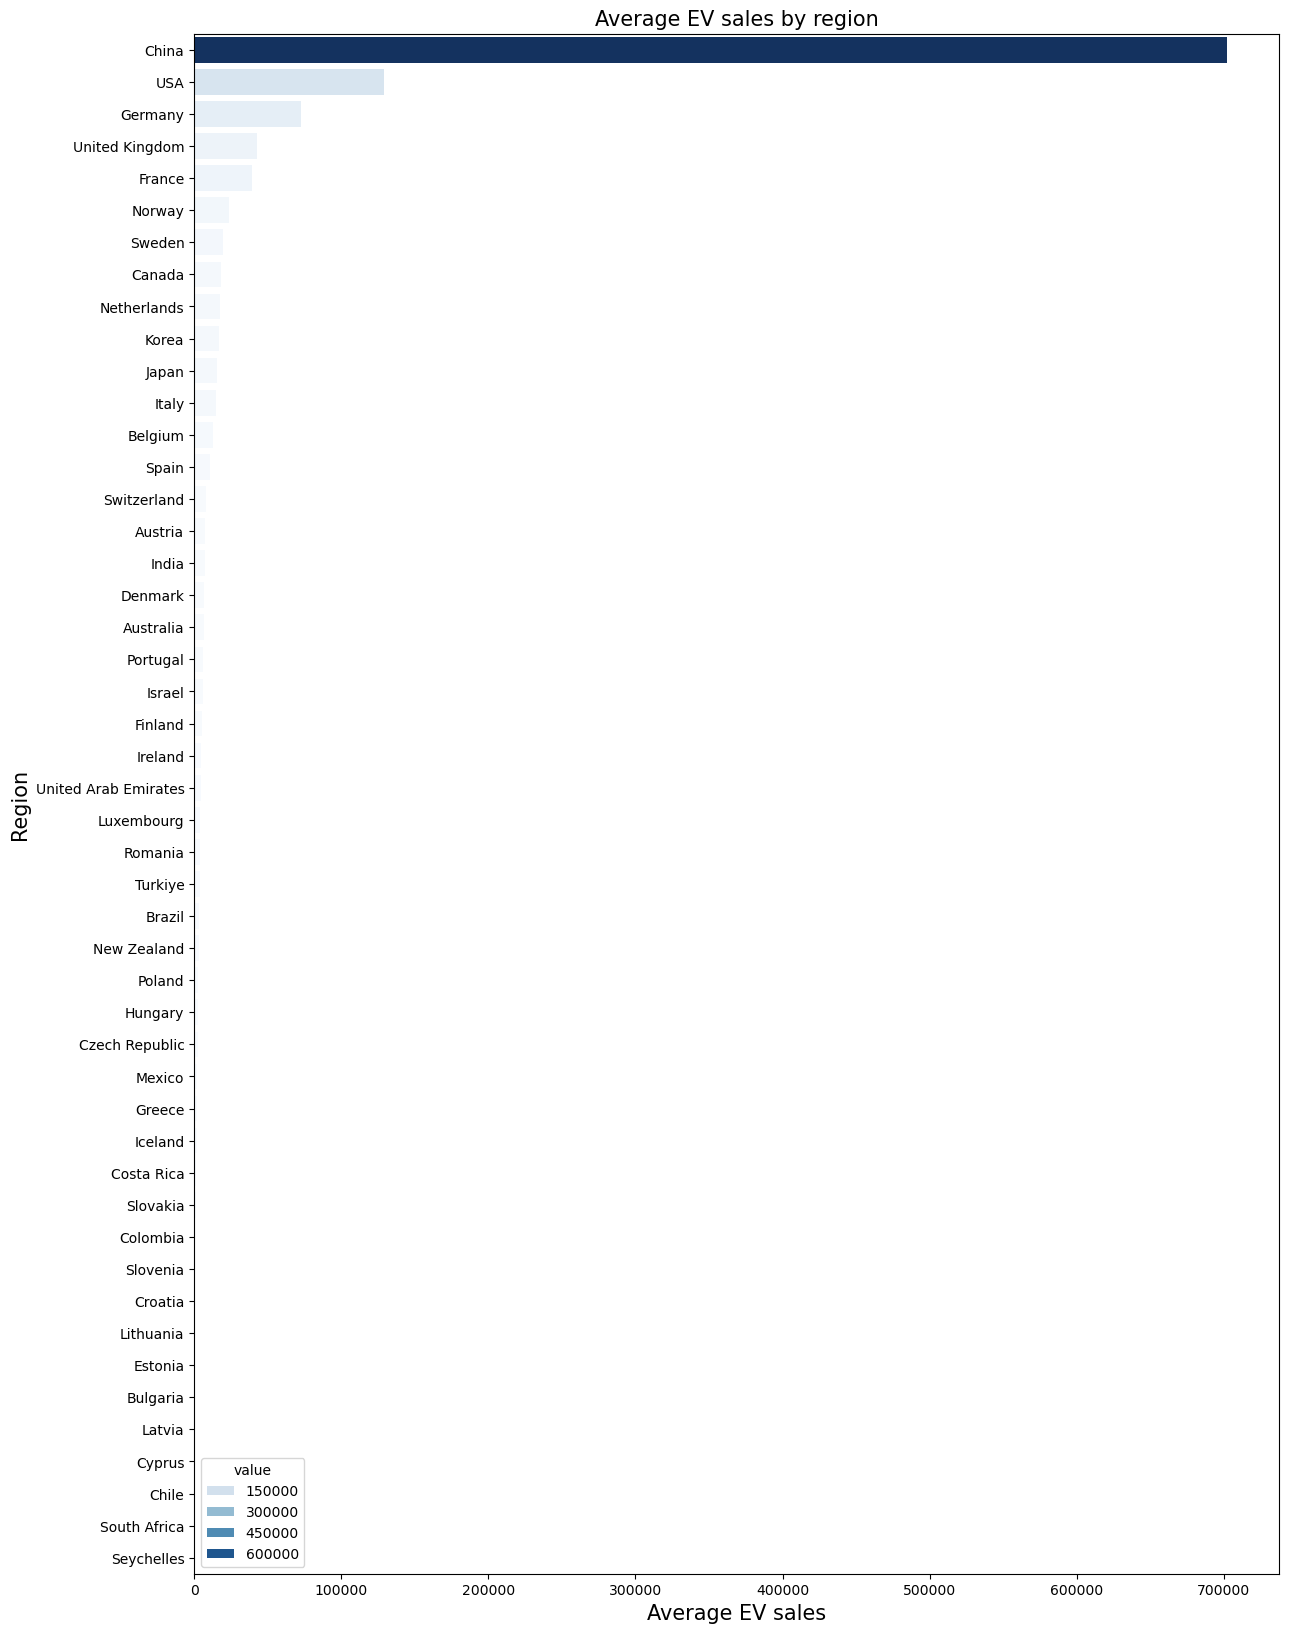

In [75]:
plt.figure(figsize=(14, 20))
sns.barplot(data = EV_sales_region2, x = EV_sales_region2['value'], y = EV_sales_region2['region'], hue = 'value', palette = 'Blues')
plt.xlabel('Average EV sales', size = 15)
plt.ylabel('Region', size = 15)
plt.title('Average EV sales by region', size = 15)
plt.show()

## Conclusions:
- China leads the world in electric car sales, followed by USA, Germany and United kingdom.
- In the USA: Tesla is the primary producer of electric , although the USA still focuses on gas-powered car manufacturers such as Ford.
- China is home to the biggest manufacturer of electric cars: BYD, which dominates the global electric car market and supported by the Chinese government.
- This reflects China's position as the leading producer of electric cars worldwide.

## Goal 2: Which region has the highest stock share in electric cars?

In [78]:
df1

,region,parameter,powertrain,year,unit,value
0,Australia,EV sales,BEV,2011,Vehicles,4.900000e+01
1,Australia,EV stock share,EV,2011,percent,3.900000e-04
2,Australia,EV sales share,EV,2011,percent,6.500000e-03
3,Australia,EV stock,BEV,2011,Vehicles,4.900000e+01
4,Australia,EV stock,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...
3639,USA,Oil displacement Mbd,EV,2023,Milion barrels per day,1.700000e-01
3640,USA,"Oil displacement, million lge",EV,2023,"Oil displacement, million lge",9.700000e+03
3641,USA,EV sales,PHEV,2023,Vehicles,2.900000e+05
3642,USA,EV stock,PHEV,2023,Vehicles,1.300000e+06


In [79]:
electric_stock_share = df1.loc[df1['parameter'] == 'EV stock share', ['region', 'parameter', 'unit', 'value']]

In [80]:
electric_stock_share

,region,parameter,unit,value
1,Australia,EV stock share,percent,0.00039
8,Australia,EV stock share,percent,0.00240
11,Australia,EV stock share,percent,0.00460
20,Australia,EV stock share,percent,0.01400
23,Australia,EV stock share,percent,0.02700
...,...,...,...,...
3590,USA,EV stock share,percent,0.62000
3609,USA,EV stock share,percent,0.77000
3612,USA,EV stock share,percent,0.95000
3632,USA,EV stock share,percent,1.30000


In [81]:
electric_stock_share1 = electric_stock_share.groupby('region')['value'].mean().reset_index()

In [82]:
electric_stock_share1

,region,value
0,Australia,0.203415
1,Austria,0.924636
2,Belgium,1.450700
3,Brazil,0.037054
4,Canada,0.578454
5,Chile,0.019508
6,China,1.549450
7,Denmark,2.092907
8,Finland,1.635354
9,France,0.874516


In [83]:
electric_stock_share2 = electric_stock_share1.sort_values(by = 'value', ascending = False)

In [84]:
electric_stock_share2

,region,value
21,Norway,9.285000
12,Iceland,4.211386
26,Sweden,2.470728
19,Netherlands,2.179114
7,Denmark,2.092907
8,Finland,1.635354
6,China,1.549450
2,Belgium,1.450700
27,Switzerland,1.379692
10,Germany,1.043427


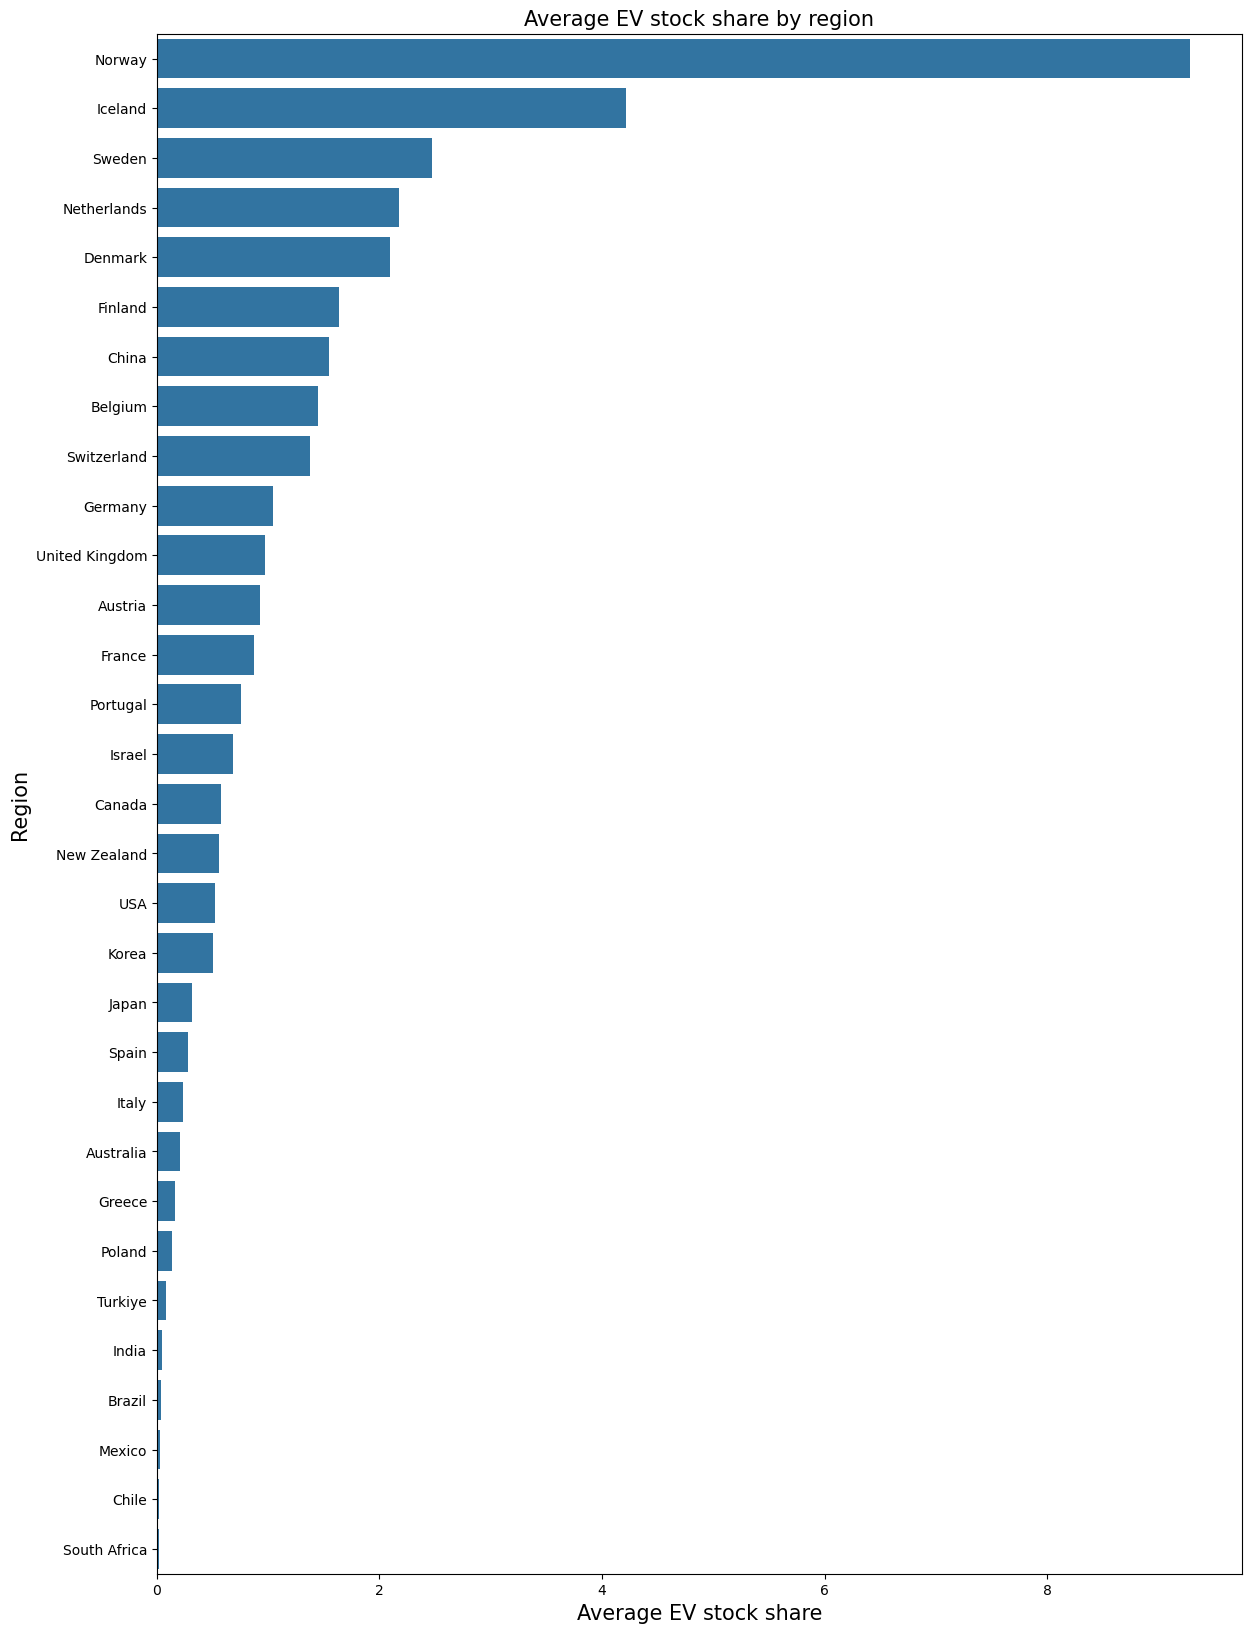

In [85]:
plt.figure(figsize=(14, 20))
sns.barplot(data = electric_stock_share2, x = electric_stock_share2['value'], y = electric_stock_share2['region'])
plt.xlabel('Average EV stock share', size = 15)
plt.ylabel('Region', size = 15)
plt.title('Average EV stock share by region', size = 15)
plt.show()

## Conclusions:
- Norway leads the world in investments in electric vehicles (High EV stock share), followed by Iceland, Sweden, Netherlands, Denmark and Finland.
- Despite China being the biggest producer of electric vehicles as we have seen from the previous chart, it shows modest stock share due to the vast supply of its car fleet.
- USA, Korea and Japan though technologically advanced, lags behind in EV stock share.
- Developing countries like India, Brazil, Mexico, Chile and South Africa have minimal EV stock share, likely due to high vehicle costs, limited infrastructre or limited government support.

In [87]:
df1

,region,parameter,powertrain,year,unit,value
0,Australia,EV sales,BEV,2011,Vehicles,4.900000e+01
1,Australia,EV stock share,EV,2011,percent,3.900000e-04
2,Australia,EV sales share,EV,2011,percent,6.500000e-03
3,Australia,EV stock,BEV,2011,Vehicles,4.900000e+01
4,Australia,EV stock,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...
3639,USA,Oil displacement Mbd,EV,2023,Milion barrels per day,1.700000e-01
3640,USA,"Oil displacement, million lge",EV,2023,"Oil displacement, million lge",9.700000e+03
3641,USA,EV sales,PHEV,2023,Vehicles,2.900000e+05
3642,USA,EV stock,PHEV,2023,Vehicles,1.300000e+06


In [88]:
df1.head(20)

,region,parameter,powertrain,year,unit,value
0,Australia,EV sales,BEV,2011,Vehicles,49.00000
1,Australia,EV stock share,EV,2011,percent,0.00039
2,Australia,EV sales share,EV,2011,percent,0.00650
3,Australia,EV stock,BEV,2011,Vehicles,49.00000
4,Australia,EV stock,BEV,2012,Vehicles,220.00000
5,Australia,EV stock,PHEV,2012,Vehicles,80.00000
6,Australia,EV sales,PHEV,2012,Vehicles,80.00000
7,Australia,EV sales share,EV,2012,percent,0.03000
8,Australia,EV stock share,EV,2012,percent,0.00240
9,Australia,EV sales,BEV,2012,Vehicles,170.00000


## Goal 3: Which year that had the most electric vehicles sold?

In [90]:
EV_sales_year = df1.loc[df['parameter'] == 'EV sales', ['region','parameter', 'unit', 'year', 'value']]

In [91]:
EV_sales_year

,region,parameter,unit,year,value
0,Australia,EV sales,Vehicles,2011,49.0
6,Australia,EV sales,Vehicles,2012,80.0
9,Australia,EV sales,Vehicles,2012,170.0
10,Australia,EV sales,Vehicles,2013,190.0
13,Australia,EV sales,Vehicles,2013,100.0
...,...,...,...,...,...
3629,USA,EV sales,Vehicles,2022,2700.0
3630,USA,EV sales,Vehicles,2022,800000.0
3635,USA,EV sales,Vehicles,2023,1100000.0
3636,USA,EV sales,Vehicles,2023,3000.0


In [92]:
EV_sales_year1 = EV_sales_year.groupby('year')['value'].mean().reset_index()

In [93]:
EV_sales_year1

,year,value
0,2010,267.615385
1,2011,1188.268293
2,2012,2262.961538
3,2013,3474.457627
4,2014,5030.895385
5,2015,6037.483516
6,2016,8310.252747
7,2017,12395.489362
8,2018,20161.740000
9,2019,19363.688073


In [94]:
EV_sales_year2 = EV_sales_year1.sort_values(by = 'value', ascending = False)

In [95]:
EV_sales_year2

,year,value
13,2023,117652.491228
12,2022,86125.162393
11,2021,54119.541667
10,2020,26892.718182
8,2018,20161.740000
9,2019,19363.688073
7,2017,12395.489362
6,2016,8310.252747
5,2015,6037.483516
4,2014,5030.895385


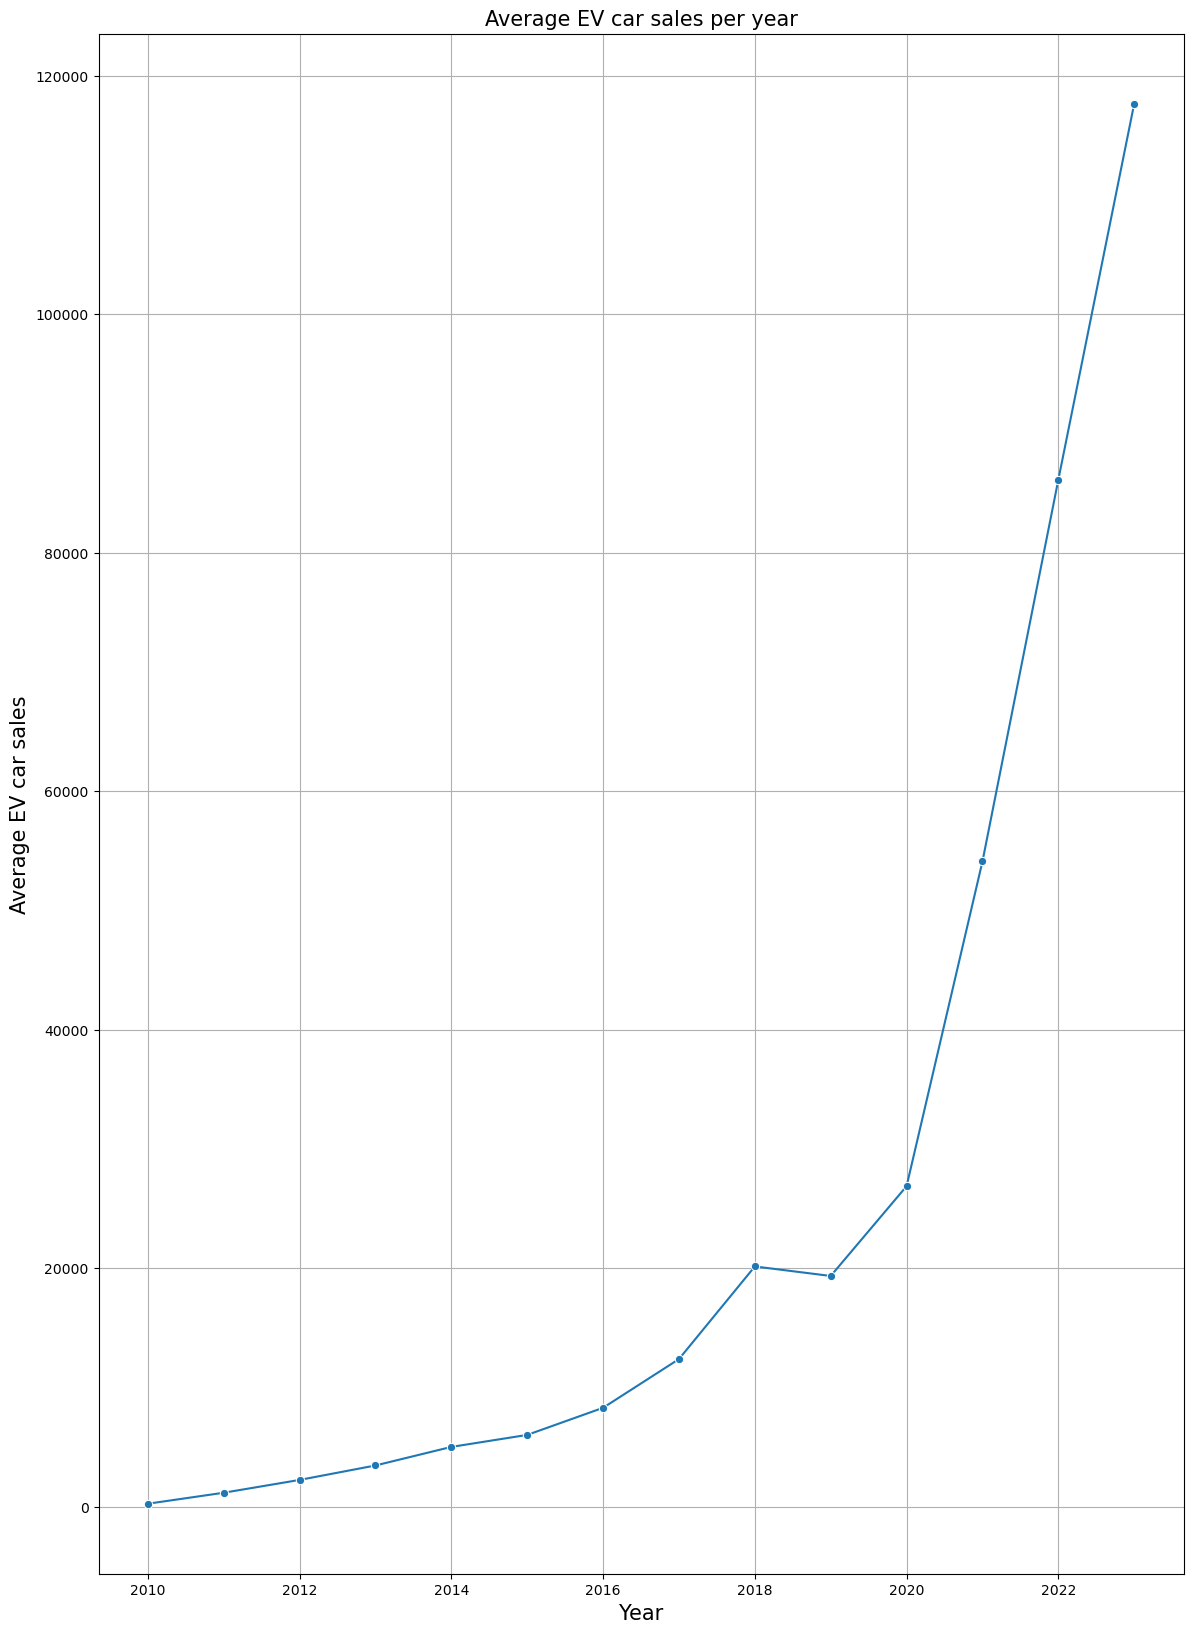

In [96]:
plt.figure(figsize=(14, 20))
sns.lineplot(data = EV_sales_year2, x = EV_sales_year2['year'], y = EV_sales_year2['value'], marker = 'o')
plt.grid()
plt.xlabel('Year', size = 15)
plt.ylabel('Average EV car sales', size = 15)
plt.title('Average EV car sales per year', size = 15)
plt.show()

## Conclusions:
- The electric car market began to emerge in 2010 and has grown rapidly up to  2023, this reflects high global demand for electric vehicles, driven by technological advancements, environmental awarness due to global warming and supportive government policies -- especially in China.

## Goal 4: Which powertrain has the highest value?

In [99]:
df1

,region,parameter,powertrain,year,unit,value
0,Australia,EV sales,BEV,2011,Vehicles,4.900000e+01
1,Australia,EV stock share,EV,2011,percent,3.900000e-04
2,Australia,EV sales share,EV,2011,percent,6.500000e-03
3,Australia,EV stock,BEV,2011,Vehicles,4.900000e+01
4,Australia,EV stock,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...
3639,USA,Oil displacement Mbd,EV,2023,Milion barrels per day,1.700000e-01
3640,USA,"Oil displacement, million lge",EV,2023,"Oil displacement, million lge",9.700000e+03
3641,USA,EV sales,PHEV,2023,Vehicles,2.900000e+05
3642,USA,EV stock,PHEV,2023,Vehicles,1.300000e+06


In [100]:
powertrain = df1.groupby('powertrain')['value'].mean().reset_index()

In [101]:
powertrain

,powertrain,value
0,BEV,107557.319215
1,EV,236.154568
2,FCEV,750.197481
3,PHEV,58661.342752


In [102]:
powertrain_sorted = powertrain.sort_values(by = 'value', ascending = False)

In [103]:
powertrain_sorted

,powertrain,value
0,BEV,107557.319215
3,PHEV,58661.342752
2,FCEV,750.197481
1,EV,236.154568


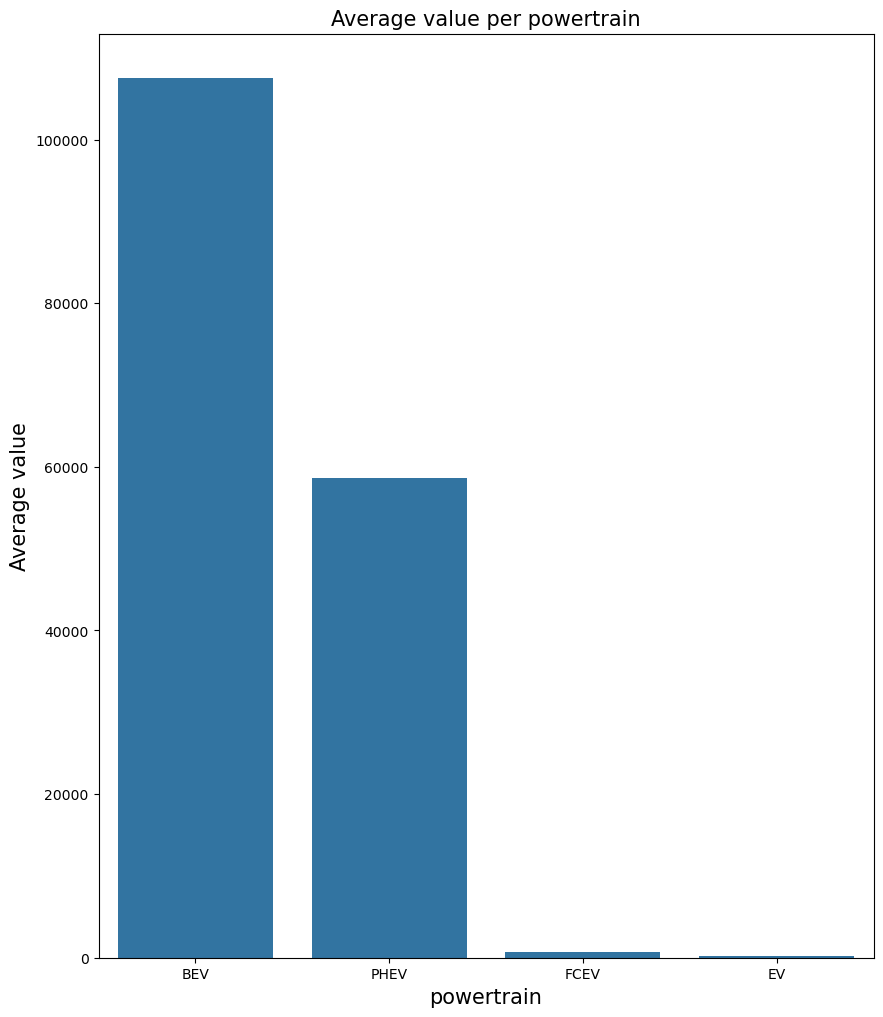

In [104]:
plt.figure(figsize=(10, 12))
sns.barplot(data = powertrain_sorted, x = powertrain_sorted['powertrain'], y = powertrain_sorted['value'])
plt.xlabel('powertrain', size = 15)
plt.ylabel('Average value', size = 15)
plt.title('Average value per powertrain', size = 15)
plt.show()

## Conclusions:
- BEV(Battery electric vehicle) has the highest value at 107557.319215 dollars, indicating strong investment in electric vehicles.
- Followed by PHEV(Plug-in hybrid electric vehicle) with a value of 58661.342752 dollars, this indicates that hybrid technology plays an important role in focusing on electric power.
- The huge value gap between BEV(Battery electric vehicle) and FCEV(Fuel Cell Electric Vehicles) indicates that the current market prefers battery powered cars than Fuel cell powered cars due to efficiency and low cost.

In [106]:
df1

,region,parameter,powertrain,year,unit,value
0,Australia,EV sales,BEV,2011,Vehicles,4.900000e+01
1,Australia,EV stock share,EV,2011,percent,3.900000e-04
2,Australia,EV sales share,EV,2011,percent,6.500000e-03
3,Australia,EV stock,BEV,2011,Vehicles,4.900000e+01
4,Australia,EV stock,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...
3639,USA,Oil displacement Mbd,EV,2023,Milion barrels per day,1.700000e-01
3640,USA,"Oil displacement, million lge",EV,2023,"Oil displacement, million lge",9.700000e+03
3641,USA,EV sales,PHEV,2023,Vehicles,2.900000e+05
3642,USA,EV stock,PHEV,2023,Vehicles,1.300000e+06


## Goal 5: Which region that generates the highest sales in BEV (Battery electric vehicles)?

In [108]:
BEV = """SELECT region, powertrain, AVG(value) as Average_value FROM df1
WHERE powertrain = 'BEV'
GROUP BY region, powertrain"""

In [109]:
BEV_Average = psql.sqldf(BEV, globals())

In [110]:
BEV_Average

,region,powertrain,Average_value
0,Australia,BEV,1.721031e+04
1,Austria,BEV,2.562760e+04
2,Belgium,BEV,2.160389e+04
3,Brazil,BEV,3.599250e+03
4,Bulgaria,BEV,4.260000e+02
5,Canada,BEV,5.982000e+04
6,Chile,BEV,3.190385e+02
7,China,BEV,2.097979e+06
8,Colombia,BEV,8.998889e+02
9,Costa Rica,BEV,1.535056e+03


In [111]:
BEV_Average_sorted = """SELECT region, powertrain, Average_value FROM BEV_Average
ORDER BY Average_value DESC"""

In [112]:
BEV_Average_sorted1 = psql.sqldf(BEV_Average_sorted, globals())

In [113]:
BEV_Average_sorted1

,region,powertrain,Average_value
0,China,BEV,2.097979e+06
1,USA,BEV,5.131000e+05
2,Germany,BEV,1.966068e+05
3,France,BEV,1.373282e+05
4,Norway,BEV,1.223129e+05
5,United Kingdom,BEV,1.195264e+05
6,Netherlands,BEV,6.479071e+04
7,Japan,BEV,6.410357e+04
8,Canada,BEV,5.982000e+04
9,Korea,BEV,5.981043e+04


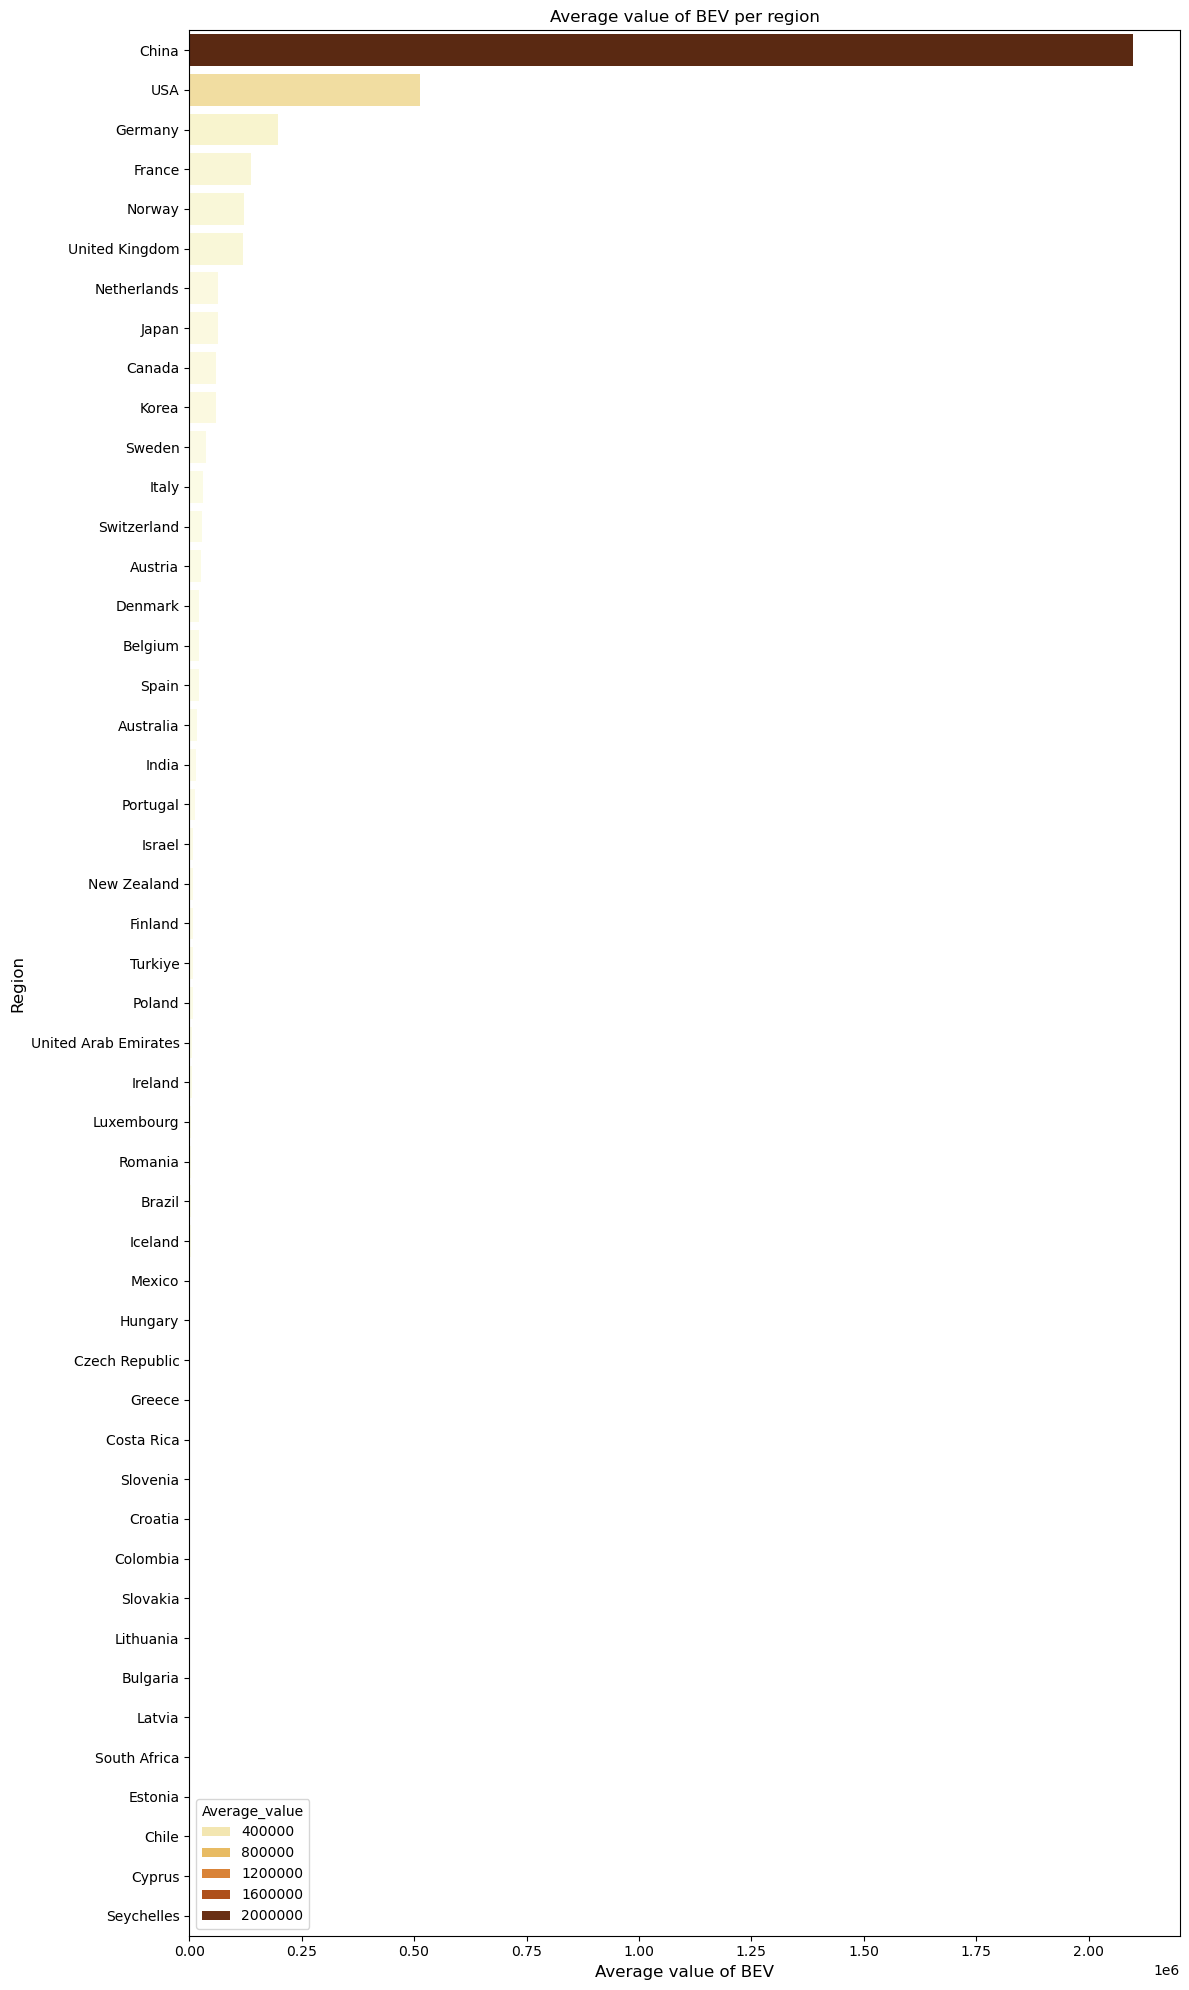

In [114]:
plt.figure(figsize= (12, 20))
sns.barplot(data = BEV_Average_sorted1, x = BEV_Average_sorted1['Average_value'], y = BEV_Average_sorted1['region'], hue = 'Average_value', 
            palette = sns.color_palette("YlOrBr", as_cmap = True))
plt.xlabel('Average value of BEV', size = 12)
plt.ylabel('Region', size = 12)
plt.title('Average value of BEV per region', size = 12)
plt.tight_layout()
plt.show()

## Conclusions:
- Suprsingly, China leads in making the highest revenues from BEV(Battery electric vehicles) cars.
- Followed by the USA, as we have stated from a previous chart, although the USA makes revenues from BEV cars by Elon Musk's Tesla company, it still depends on Gas-powered car companies such as Ford.

In [116]:
df1.head(20)

,region,parameter,powertrain,year,unit,value
0,Australia,EV sales,BEV,2011,Vehicles,49.00000
1,Australia,EV stock share,EV,2011,percent,0.00039
2,Australia,EV sales share,EV,2011,percent,0.00650
3,Australia,EV stock,BEV,2011,Vehicles,49.00000
4,Australia,EV stock,BEV,2012,Vehicles,220.00000
5,Australia,EV stock,PHEV,2012,Vehicles,80.00000
6,Australia,EV sales,PHEV,2012,Vehicles,80.00000
7,Australia,EV sales share,EV,2012,percent,0.03000
8,Australia,EV stock share,EV,2012,percent,0.00240
9,Australia,EV sales,BEV,2012,Vehicles,170.00000


## Goal 7:Which region that generates the highest sales in PHEV (Plug-in hybrid electric vehicles)?

In [118]:
PHEV = """SELECT region, powertrain, AVG(value) as Average_value FROM df1
WHERE powertrain = 'PHEV'
GROUP BY region, powertrain"""

In [119]:
PHEV_avg = psql.sqldf(PHEV, globals())

In [120]:
PHEV_avg

,region,powertrain,Average_value
0,Australia,PHEV,5462.083333
1,Austria,PHEV,10991.904762
2,Belgium,PHEV,37408.892857
3,Brazil,PHEV,8245.450000
4,Bulgaria,PHEV,98.625000
5,Canada,PHEV,31430.769231
6,Chile,PHEV,307.800000
7,China,PHEV,682577.500000
8,Colombia,PHEV,880.444444
9,Croatia,PHEV,487.400000


In [121]:
PHEV_avg1 = """SELECT region, powertrain, Average_value FROM PHEV_avg
ORDER BY Average_value DESC"""

In [122]:
PHEV_avg1_sorted = psql.sqldf(PHEV_avg1, globals())

In [123]:
PHEV_avg1_sorted

,region,powertrain,Average_value
0,China,PHEV,682577.500000
1,USA,PHEV,269653.846154
2,Germany,PHEV,165056.923077
3,United Kingdom,PHEV,93772.750000
4,France,PHEV,84716.444444
5,Japan,PHEV,62170.384615
6,Sweden,PHEV,56658.750000
7,Netherlands,PHEV,53505.703704
8,Norway,PHEV,47714.038462
9,Italy,PHEV,39589.090909


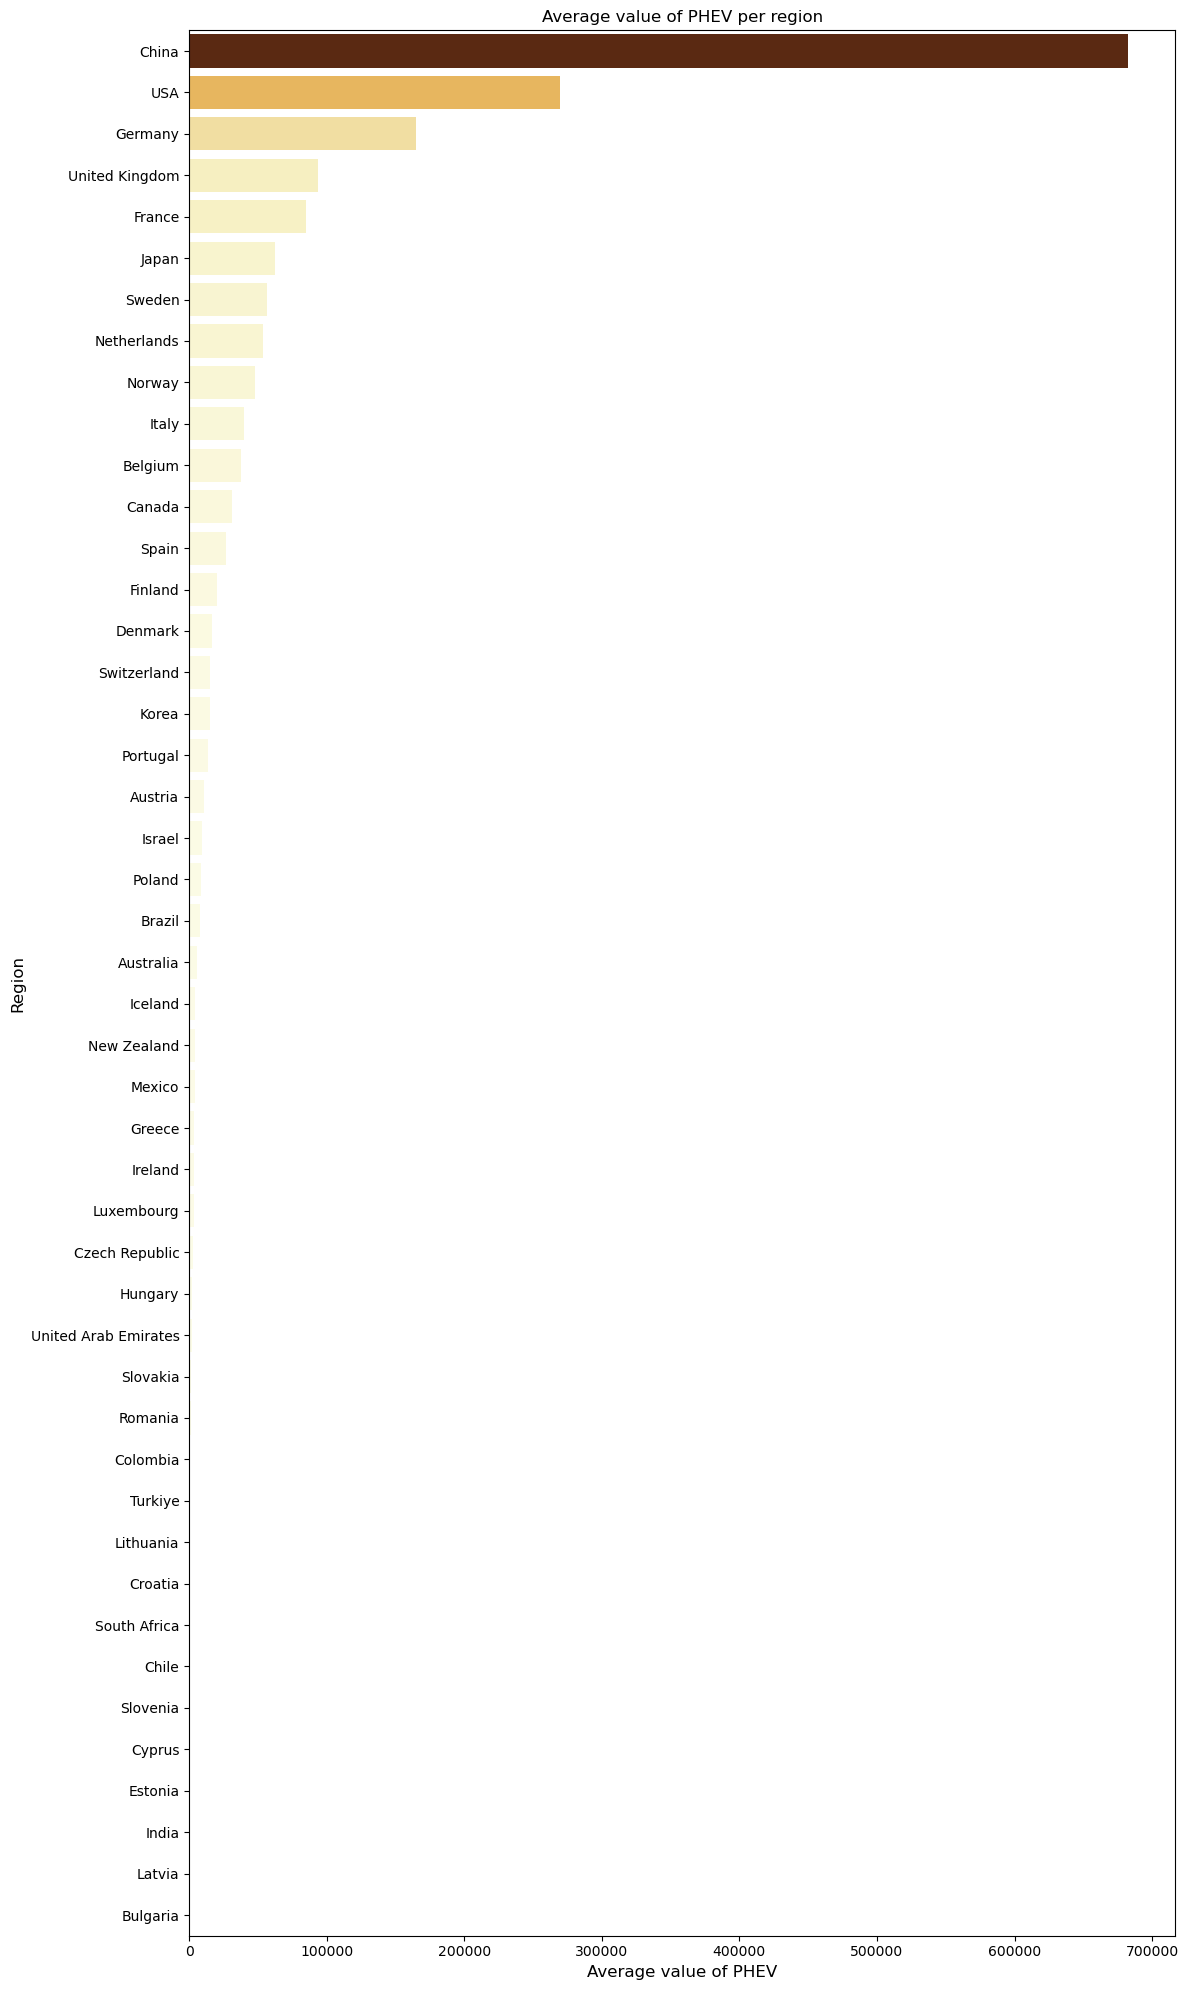

In [124]:
plt.figure(figsize= (12, 20))
sns.barplot(data = PHEV_avg1_sorted, x = PHEV_avg1_sorted['Average_value'], y = PHEV_avg1_sorted['region'], hue = 'Average_value', 
            palette = sns.color_palette("YlOrBr", as_cmap = True))
plt.xlabel('Average value of PHEV', size = 12)
plt.ylabel('Region', size = 12)
plt.title('Average value of PHEV per region', size = 12)
plt.tight_layout()
plt.legend().remove()
plt.show()

## Conclusions:
- Suprsingly, China leads in making revenues from PHEV (Plug-in hybrid electric vehicles) cars.
- Followed by the USA.